In [96]:
import numpy as np
import torch
from torch import nn
import random
import matplotlib.pyplot as plt

device = 'cuda'

XOR_DATA = [[0, 0], [1, 0], [0, 1], [1, 1]]
XOR_TARGETS = [[0], [1], [1], [0]]

X = torch.tensor(XOR_DATA, dtype=torch.float32).to(device)
Y = torch.tensor(XOR_TARGETS, dtype=torch.float32).to(device)


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            nn.Linear(2, 2, bias=True),
            nn.Sigmoid(),
            nn.Linear(2, 1, bias=True),
            nn.Sigmoid()
        ).to(device)

    def forward(self, x):
        return self.layers(x)


def norm(vec):
    return torch.nn.functional.normalize(vec, p=2, dim=1)


def mag(vec):
    return vec.norm(p=2, dim=1, keepdim=True)


def plot(trainer):
    figure, axes = plt.subplots()
    uc_3 = plt.Circle(trainer.c, trainer.R, fill=False)

    new_x = []
    new_y = []

    for data in transformed_data:
        map = dsvdd.forward(torch.nn.functional.normalize(data, p=2, dim=0)).cpu().detach().numpy()
        new_x.append(map[0])
        new_y.append(map[1])

    #print(mixin_training[-10:])
    anomalous = transformed_data[0].cpu().detach().numpy()
    #
    anomalous[0] = random.random() * -20
    anomalous[1] = random.random() * -15

    an_x = []
    an_y = []
    print(len(t_outlier_data))
    for outlier in t_outlier_data:
        outlier_pos = dsvdd.forward(torch.nn.functional.normalize(outlier, p=2, dim=0)).cpu().detach().numpy()
        an_x.append(outlier_pos[0])
        an_y.append(outlier_pos[1])

    print(len(an_x))
    anomalous = torch.tensor(anomalous, dtype=torch.float32, device=device)
    an = dsvdd.forward(torch.nn.functional.normalize(anomalous, p=2, dim=0)).cpu().detach().numpy()
    center = dsvdd_trainer.c.cpu().detach().numpy()
    points_2 = plt.scatter(new_x, new_y,
                           color="yellow", s=5)
    print(new_x)
    print(new_y)
    #plt.scatter(an_x, an_y,
    #            color="red", s=5)
    plt.scatter(center[0], center[1],
                color="blue", s=5)
    axes.add_artist(uc_3)
    plt.gca().add_patch(uc_3)
    plt.axis('equal')
    plt.show()


torch.manual_seed(42)
#trainloader = torch.utils.data.DataLoader(list(zip(X, Y)), batch_size=1)
#mlp = MLP()
#
#loss_function = nn.MSELoss().to(device)
#optimizer = torch.optim.SGD(mlp.parameters(), lr=0.1)
#
#for epoch in range(0, 10000):
#    current_loss = 0.0
#    for i, data in enumerate(trainloader, 0):
#        inputs, targets = data
#        optimizer.zero_grad()
#        outputs = mlp(inputs)
#        loss = loss_function(outputs, targets)
#        loss.backward()
#        optimizer.step()
#        current_loss += loss.item()
#
#print(mlp.forward(X))
#print('Training process has finished')

tensor([0.0933, 0.2994, 0.0969, 0.2979, 0.1032, 0.3009, 0.1024, 0.2965, 0.1006,
        0.2999, 0.1023, 0.3038, 0.1008, 0.2983, 0.1015, 0.2957, 0.1056, 0.3062,
        0.0977, 0.3061], device='cuda:0', grad_fn=<SqueezeBackward4>)
tensor([ 6.8979, 22.1361,  7.1669, 22.0273,  7.6276, 22.2484,  7.5732, 21.9237,
         7.4391, 22.1723,  7.5649, 22.4604,  7.4543, 22.0534,  7.5075, 21.8599,
         7.8103, 22.6427,  7.2224, 22.6346], device='cuda:0',
       grad_fn=<MulBackward0>)
tensor([ 6.8979, 22.1361,  7.1669, 22.0273,  7.6276, 22.2484,  7.5732, 21.9237,
         7.4391, 22.1723,  7.5649, 22.4604,  7.4543, 22.0534,  7.5075, 21.8599,
         7.8103, 22.6427,  7.2224, 22.6346])
tensor([ 6.9943, 22.4537,  7.2678, 22.3405,  7.7397, 22.5658,  7.6845, 22.2377,
         7.5461, 22.4875,  7.6690, 22.7846,  7.5584, 22.3650,  7.6126, 22.1719,
         7.9246, 22.9665,  7.3305, 22.9566])
tensor([ 7.1272, 22.8755,  7.4054, 22.7618,  7.8835, 22.9907,  7.8273, 22.6557,
         7.6877, 22.9117,  

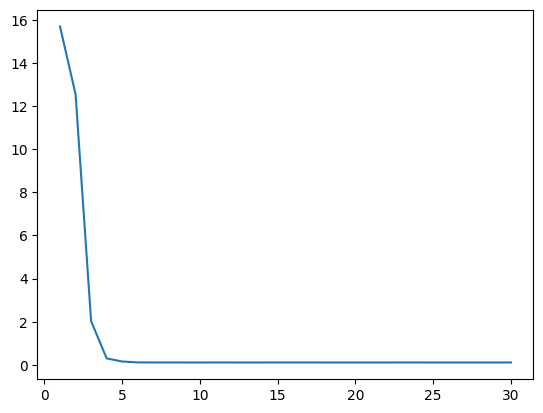

In [37]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            nn.Linear(20, 20, bias=False),
            nn.LeakyReLU(),
            nn.Linear(20, 10, bias=False),
            nn.LeakyReLU(),
            nn.Linear(10, 2, bias=False),
            nn.LeakyReLU(),
            nn.Linear(2, 10, bias=False),
            nn.LeakyReLU(),
            nn.Linear(10, 20, bias=False),
            nn.LeakyReLU(),
            nn.Linear(20, 20, bias=False)
        ).to(device)

    def forward(self, x):
        return self.layers(x)


class AETrainer():
    def __init__(self, model):
        self.model = model

    def train(self, training_data):
        train_loader = torch.utils.data.DataLoader(list(zip(training_data, training_data)), batch_size=1, shuffle=True)
        loss_function = nn.L1Loss(reduction='sum').to(device)
        optimizer = torch.optim.SGD(self.model.parameters(), lr=0.001)
        losses = []
        for epoch in range(0, 30):
            epoch_loss = []
            for i, data in enumerate(train_loader, 0):
                inputs, targets = data
                optimizer.zero_grad()
                inputs = norm(inputs)
                targets = torch.nn.functional.normalize(targets, p=2, dim=1)
                outputs = self.model(inputs)
                loss = loss_function(outputs, targets) * loss_function(outputs, targets)
                loss.backward()
                optimizer.step()
                epoch_loss.append(loss.item())
            losses.append(sum(epoch_loss) / len(epoch_loss))
        return losses

    def model(self):
        return self.model()


X = (5, 10)
Y = (20, 25)


def my_plot(epochs, loss):
    plt.plot(epochs, loss)


training_samples = []
validation_data = []
outlier_data_set = []
for i in range(1000):
    training_samples.append([random.uniform(X[0], X[1]), random.uniform(Y[0], Y[1])])

transformed_data = []
t_validation_data = []
t_outlier_data = []

for i in range(200):
    validation_data.append([random.uniform(X[0], X[1]), random.uniform(Y[0], Y[1])])

for i in range(300):
    outlier_data_set.append([random.uniform(11, 20), random.uniform(26, 30)])

for i in range(300):
    outlier_data_set.append([random.uniform(-5, 4), random.uniform(-5, 19)])

for i in range(0, 1000, 10):
    sample = training_samples[i:i + 10]
    t_data = []
    for x, y in sample:
        t_data.append(x)
        t_data.append(y)
    transformed_data.append(t_data)

for i in range(0, 200, 10):
    sample = validation_data[i:i + 10]
    t_data = []
    for x, y in sample:
        t_data.append(x)
        t_data.append(y)
    t_validation_data.append(t_data)

for i in range(0, 600, 10):
    sample = outlier_data_set[i:i + 10]
    t_data = []
    for x, y in sample:
        t_data.append(x)
        t_data.append(y)
    t_outlier_data.append(t_data)

mixin_training = transformed_data + t_outlier_data
transformed_data = torch.tensor(transformed_data, dtype=torch.float32).to(device)
t_validation_data = torch.tensor(t_validation_data, dtype=torch.float32).to(device)
t_outlier_data = torch.tensor(t_outlier_data, dtype=torch.float32).to(device)
mixin_training = torch.tensor(mixin_training, dtype=torch.float32).to(device)

ae = AutoEncoder()
ae_trainer = AETrainer(ae)
losses = ae_trainer.train(transformed_data)
my_plot(np.linspace(1, 30, 30).astype(int), losses)
b = transformed_data[0]
#print(b)


#print(torch.nn.functional.normalize(transformed_data[0],p=2, dim=0) * transformed_data[0].norm(p=2, dim=0, keepdim=True))
#print(torch.nn.functional.normalize(transformed_data[0],p=2, dim=0))
a = ae.forward(torch.nn.functional.normalize(transformed_data[0], p=2, dim=0))
print(a)
print(a * transformed_data[0].norm(p=2, dim=0, keepdim=True))
#print(transformed_data[0])

second_x = []
second_y = []
for d in transformed_data:
    s = ae.forward(torch.nn.functional.normalize(d, p=2, dim=0)).cpu().detach()
    s = s * d.norm(p=2, dim=0, keepdim=True).cpu()
    print(s)
    for i in range(0, 20, 2):
        second_x.append(s[i])
        second_y.append(s[i + 1])


#print(second_y)
#print(second_x)

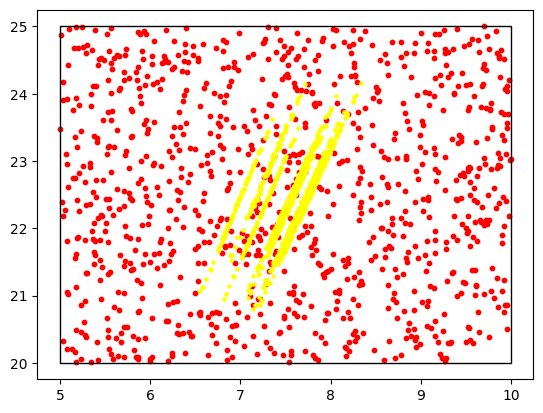

In [38]:
figure, axes = plt.subplots()
#axes.set(xlim=(5, 10), ylim=(20, 25))
uc_3 = plt.Rectangle((5, 20), 5, 5, fill=False)
new_x = []
new_y = []
for z in training_samples:
    new_x.append(z[0])
    new_y.append(z[1])
points_1 = plt.scatter(new_x,
                       new_y,
                       color="red", s=10)
points_2 = plt.scatter(second_x, second_y,
                       color="yellow", s=5)
axes.add_artist(uc_3)
plt.show()

60
60
[0.37330666, 0.37028152, 0.3807, 0.3695326, 0.3705997, 0.36976337, 0.36216146, 0.36770743, 0.36652756, 0.36621904, 0.37252605, 0.3757341, 0.36686727, 0.36713296, 0.37350866, 0.36329955, 0.366109, 0.3568428, 0.3668801, 0.3664502, 0.36653966, 0.37617555, 0.37282214, 0.3677928, 0.3679672, 0.36707973, 0.36926883, 0.37201947, 0.3744406, 0.37149253, 0.36868802, 0.36307707, 0.37099588, 0.36883232, 0.363833, 0.3671083, 0.3711352, 0.3732014, 0.37215343, 0.37136132, 0.37377468, 0.37177157, 0.37370497, 0.3704359, 0.37776226, 0.3697734, 0.37165248, 0.376906, 0.37191957, 0.36191845, 0.37305677, 0.3636096, 0.3748901, 0.36214894, 0.37274414, 0.36619982, 0.37506908, 0.36480367, 0.3616028, 0.37196642, 0.3641621, 0.36782134, 0.3639473, 0.3731637, 0.36903727, 0.3664707, 0.36628783, 0.37366185, 0.36254936, 0.3702457, 0.3723938, 0.3754399, 0.3714437, 0.3678195, 0.3700663, 0.36668226, 0.36520147, 0.37166965, 0.36782756, 0.3681653, 0.36710423, 0.36603656, 0.37213308, 0.37256464, 0.37064147, 0.37999597,

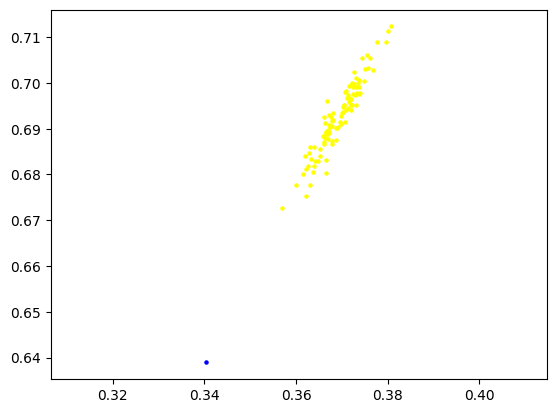

60
60
[0.3424859, 0.34332317, 0.35048494, 0.34128743, 0.34103635, 0.34169102, 0.33471328, 0.34066853, 0.33926332, 0.33923063, 0.3447219, 0.34567386, 0.34114903, 0.34136197, 0.34522846, 0.33727092, 0.33931226, 0.33169737, 0.34077388, 0.33943057, 0.3394925, 0.34645557, 0.34309196, 0.34134609, 0.34092295, 0.3400041, 0.34119645, 0.34317288, 0.34540004, 0.34207428, 0.34196523, 0.33738905, 0.34301051, 0.3406509, 0.33868644, 0.34060305, 0.3426838, 0.34402254, 0.3424871, 0.34271482, 0.34451982, 0.34423146, 0.34442168, 0.34091768, 0.34687608, 0.34133053, 0.3423575, 0.3458462, 0.3446673, 0.33574432, 0.3445331, 0.33640054, 0.34490848, 0.33661544, 0.34507096, 0.33926246, 0.34727997, 0.33610508, 0.3365342, 0.3434, 0.33605006, 0.34044927, 0.3378514, 0.3443078, 0.34070274, 0.33971125, 0.3390211, 0.3445057, 0.3374257, 0.34273875, 0.34296548, 0.34658438, 0.3434953, 0.34141162, 0.34324288, 0.3374226, 0.33927613, 0.34217638, 0.33968922, 0.33941543, 0.34167, 0.3375229, 0.34250185, 0.34363908, 0.34186977, 

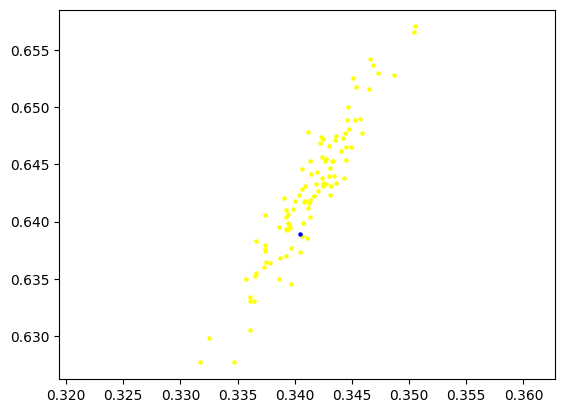

60
60
[0.33764866, 0.33826226, 0.34457105, 0.3379363, 0.33624464, 0.33688974, 0.33207065, 0.3357456, 0.33525556, 0.3345389, 0.34084478, 0.34156972, 0.33715683, 0.3363018, 0.33937368, 0.3327949, 0.33574796, 0.32896775, 0.3374576, 0.33471394, 0.33473143, 0.340831, 0.33844072, 0.3365634, 0.33498925, 0.33539268, 0.33671874, 0.3396181, 0.3396594, 0.33646333, 0.33936408, 0.33456364, 0.3381097, 0.33591703, 0.33510393, 0.33528006, 0.33984867, 0.33982337, 0.33803865, 0.33766222, 0.3389138, 0.33976036, 0.33896244, 0.33765748, 0.3425262, 0.33660957, 0.33764553, 0.3400746, 0.33963385, 0.332393, 0.33964324, 0.33415216, 0.34026694, 0.33335215, 0.3401541, 0.33548626, 0.3418291, 0.33268166, 0.33374998, 0.3396497, 0.33212546, 0.33557037, 0.3341772, 0.33925322, 0.33630902, 0.336879, 0.33538917, 0.338778, 0.33363754, 0.3390549, 0.33808732, 0.34193987, 0.33875072, 0.33683777, 0.33863547, 0.33393496, 0.33516288, 0.33835068, 0.33642668, 0.33638558, 0.33727723, 0.33299223, 0.3386084, 0.3388707, 0.33593935, 0

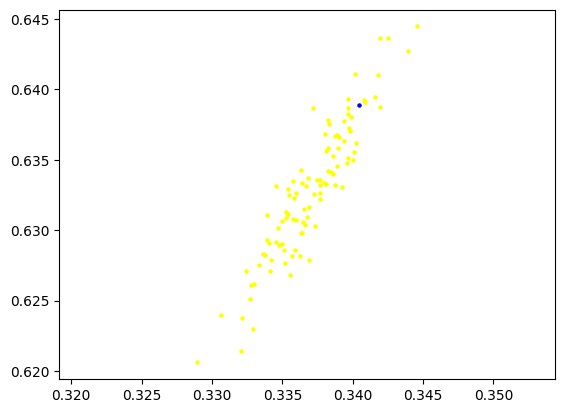

60
60
[0.34047696, 0.34114525, 0.34568378, 0.34075344, 0.33970365, 0.3412212, 0.3367025, 0.3388473, 0.3387189, 0.338683, 0.34441796, 0.34432572, 0.34056124, 0.33902973, 0.34268993, 0.33671054, 0.33930779, 0.3352115, 0.3406403, 0.3375199, 0.33911768, 0.3443238, 0.3416142, 0.34003463, 0.3387276, 0.3389277, 0.33976126, 0.3430436, 0.34245503, 0.3391289, 0.3431303, 0.34013098, 0.34177342, 0.33887717, 0.33792743, 0.3393315, 0.34415588, 0.34349656, 0.34213623, 0.3419646, 0.34198624, 0.34344628, 0.34274095, 0.34135765, 0.34590408, 0.3408682, 0.3406704, 0.34140038, 0.34292093, 0.33610368, 0.34478176, 0.3389094, 0.3434169, 0.33776703, 0.34308976, 0.33804044, 0.34417102, 0.336774, 0.3384109, 0.3422158, 0.334751, 0.3382383, 0.33800662, 0.34258962, 0.34006846, 0.33991662, 0.3380397, 0.34107912, 0.33720845, 0.3414998, 0.34086984, 0.34750873, 0.34314397, 0.3396144, 0.34176892, 0.33835354, 0.33920693, 0.34254348, 0.33913356, 0.33935457, 0.339247, 0.336471, 0.3413451, 0.34308112, 0.33856267, 0.34492254

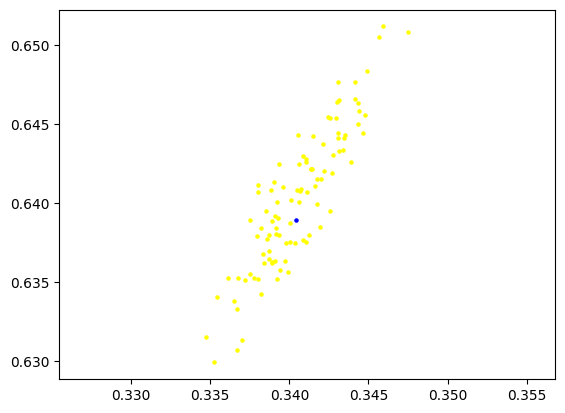

60
60
[0.34149957, 0.3417706, 0.34609503, 0.3419145, 0.34075958, 0.34214514, 0.3374095, 0.33960953, 0.33968273, 0.33941767, 0.34472722, 0.34527874, 0.34143072, 0.3406394, 0.34273064, 0.33750677, 0.3399441, 0.33721468, 0.34113568, 0.33931834, 0.34035015, 0.34518754, 0.34256065, 0.3417741, 0.34022647, 0.34041572, 0.34008908, 0.34430465, 0.3435446, 0.34019405, 0.34324107, 0.34080064, 0.34238464, 0.3394662, 0.34023228, 0.33973062, 0.3454524, 0.34464183, 0.34289986, 0.3426466, 0.3420733, 0.343905, 0.34362888, 0.34290045, 0.34646496, 0.3408399, 0.341892, 0.3417756, 0.34350532, 0.3381226, 0.3455863, 0.34006143, 0.34395877, 0.33876407, 0.34377348, 0.34006375, 0.34415793, 0.33866596, 0.33891588, 0.34298897, 0.33653605, 0.33899063, 0.33884138, 0.34302106, 0.34125516, 0.33996874, 0.33930996, 0.34145188, 0.33803195, 0.34239724, 0.34216627, 0.34806204, 0.3435112, 0.34047985, 0.34198374, 0.33958703, 0.34026805, 0.34349963, 0.34010828, 0.34078342, 0.3406913, 0.33757687, 0.34240955, 0.34378743, 0.3404

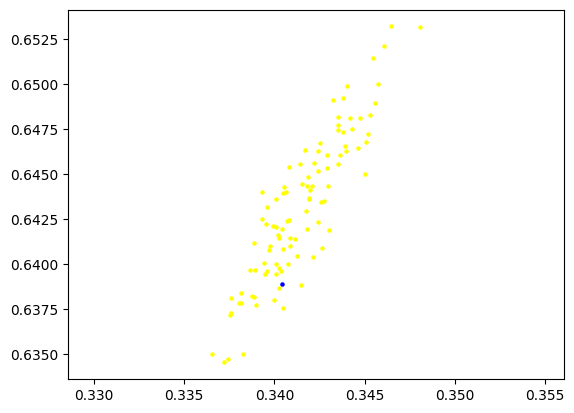

60
60
[0.34275576, 0.34183812, 0.34601533, 0.34259513, 0.34151256, 0.3420422, 0.33747134, 0.339812, 0.339851, 0.34008223, 0.3443234, 0.34467518, 0.34102315, 0.34108603, 0.34247267, 0.33853763, 0.34040648, 0.33761638, 0.34052962, 0.340271, 0.34078914, 0.3452389, 0.34239978, 0.34239516, 0.34063306, 0.34071514, 0.33980256, 0.34494495, 0.3437334, 0.34092507, 0.34250617, 0.34037393, 0.34238732, 0.33981994, 0.34069076, 0.34000504, 0.34534144, 0.34421527, 0.3425908, 0.34243593, 0.34208906, 0.34370378, 0.34389156, 0.3429711, 0.34599188, 0.34074366, 0.34208587, 0.3419051, 0.34346145, 0.3386516, 0.34557444, 0.33991987, 0.34395117, 0.33881307, 0.34347427, 0.3407274, 0.34389138, 0.3394392, 0.33915484, 0.34304112, 0.33775732, 0.3398262, 0.338956, 0.34282592, 0.34134513, 0.3395488, 0.3397863, 0.34124085, 0.3385049, 0.34210256, 0.3425694, 0.3473068, 0.34380853, 0.34127298, 0.34207192, 0.3403647, 0.3405808, 0.34356374, 0.34107006, 0.34130335, 0.34091976, 0.33822015, 0.34308168, 0.34371078, 0.3413924, 

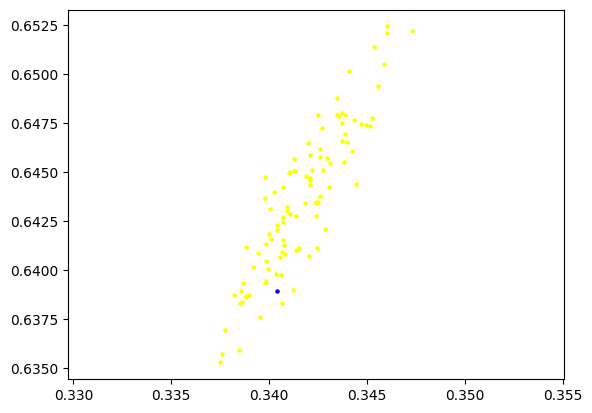

60
60
[0.34258407, 0.3414603, 0.34539145, 0.34237835, 0.34135208, 0.34148622, 0.33679497, 0.33964533, 0.3395192, 0.34012502, 0.34329212, 0.34345913, 0.34032127, 0.34094858, 0.34189704, 0.33888665, 0.3400379, 0.33708248, 0.33974826, 0.3404882, 0.3405988, 0.3448128, 0.34170055, 0.34230676, 0.34040633, 0.3403004, 0.33914492, 0.34428722, 0.3433664, 0.34090754, 0.3410678, 0.33958796, 0.34188795, 0.3395376, 0.34031487, 0.33970374, 0.34431043, 0.34319344, 0.34171653, 0.3416764, 0.34147084, 0.34302026, 0.3435182, 0.34246957, 0.345038, 0.34002152, 0.34156427, 0.34160227, 0.3428216, 0.33870825, 0.34476766, 0.33886254, 0.3431522, 0.33829856, 0.34282482, 0.34068677, 0.34325436, 0.3391939, 0.33889544, 0.3424847, 0.33843744, 0.340171, 0.33855474, 0.3421815, 0.34092894, 0.33885112, 0.33981478, 0.3406869, 0.33840823, 0.3413294, 0.34241933, 0.3458882, 0.3434349, 0.3415526, 0.34162158, 0.34015614, 0.340215, 0.3429324, 0.34105167, 0.34080684, 0.34066057, 0.33837593, 0.34282893, 0.3428531, 0.34190306, 0.3

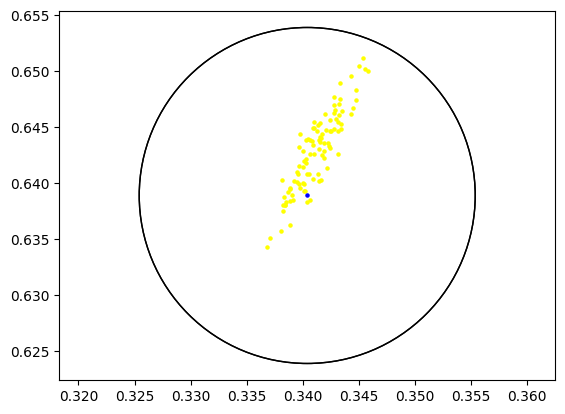

60
60
[0.34224325, 0.34123313, 0.34486496, 0.34220558, 0.34101063, 0.34117585, 0.33632693, 0.3395574, 0.33937404, 0.34022155, 0.3425549, 0.34242406, 0.3399608, 0.34095854, 0.34156495, 0.33909607, 0.33971173, 0.33663368, 0.3394602, 0.34047306, 0.3404781, 0.34450752, 0.34123355, 0.34215787, 0.34021908, 0.33995757, 0.33883598, 0.34353518, 0.34309357, 0.34080428, 0.33997804, 0.33911425, 0.34149125, 0.3393739, 0.33981898, 0.33954164, 0.34330875, 0.34234598, 0.34106934, 0.3411941, 0.34102792, 0.34256735, 0.34316176, 0.34191298, 0.34416386, 0.3393697, 0.34111, 0.34129027, 0.3423016, 0.33872658, 0.34400177, 0.33809474, 0.34237188, 0.33791718, 0.34242487, 0.34062874, 0.342897, 0.338754, 0.33872646, 0.34195203, 0.33898765, 0.3404268, 0.33849883, 0.34173054, 0.34049517, 0.33832827, 0.33974612, 0.34048536, 0.33842534, 0.34085774, 0.342211, 0.3447171, 0.34313917, 0.3417237, 0.3412857, 0.34006634, 0.33980745, 0.3423794, 0.34096277, 0.3403627, 0.34044757, 0.33850756, 0.34259853, 0.34208462, 0.3421177

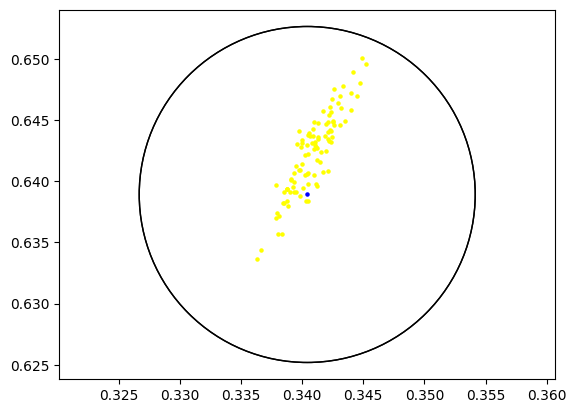

60
60
[0.3421436, 0.3411075, 0.34445795, 0.34235078, 0.34090015, 0.3410985, 0.33637962, 0.33976555, 0.33937705, 0.34041977, 0.34225136, 0.3419509, 0.33984888, 0.34120694, 0.3414148, 0.33953583, 0.33976483, 0.33638772, 0.3395084, 0.34064466, 0.34045997, 0.34430656, 0.34098828, 0.3421418, 0.34013122, 0.3397506, 0.3388591, 0.3430658, 0.34294218, 0.34069318, 0.33931816, 0.33909193, 0.3412091, 0.33963177, 0.33948317, 0.33954713, 0.34267756, 0.34170428, 0.3406432, 0.34101197, 0.3408146, 0.34229904, 0.34310085, 0.34165064, 0.34372804, 0.33920664, 0.34078735, 0.34125388, 0.34200528, 0.33899456, 0.3436068, 0.3378563, 0.3417152, 0.33768567, 0.3422023, 0.34087077, 0.34275073, 0.338617, 0.33898035, 0.3417806, 0.3396541, 0.3409587, 0.33879903, 0.34143645, 0.34032735, 0.33824673, 0.3398875, 0.34067768, 0.3388801, 0.34073347, 0.34224987, 0.34382415, 0.34317628, 0.34204054, 0.3410972, 0.3404091, 0.33972692, 0.34219223, 0.3411529, 0.34027907, 0.34051403, 0.3390047, 0.34269553, 0.3414961, 0.3423435, 0.3

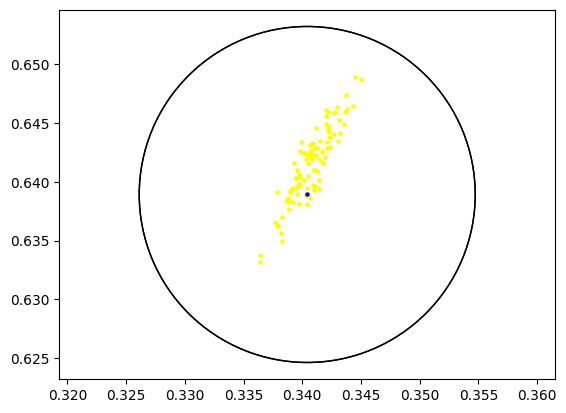

60
60
[0.34201366, 0.3412582, 0.3443524, 0.34249023, 0.340785, 0.3413452, 0.33659554, 0.33999705, 0.33969414, 0.3408293, 0.34219593, 0.34166306, 0.3401302, 0.3414649, 0.34153372, 0.33990785, 0.33990628, 0.3364921, 0.33995986, 0.34077424, 0.34069794, 0.34433198, 0.3409958, 0.3420957, 0.34031186, 0.33984494, 0.33912677, 0.34264567, 0.34304518, 0.3407792, 0.33906192, 0.33917856, 0.34125245, 0.33992416, 0.3391979, 0.33983868, 0.34215218, 0.3412754, 0.34058836, 0.34117383, 0.3409403, 0.3423562, 0.3430179, 0.34144798, 0.3433937, 0.339186, 0.34077063, 0.3412236, 0.34178722, 0.3392434, 0.3432366, 0.33790022, 0.3414315, 0.33771876, 0.34231457, 0.34110346, 0.34290177, 0.3385397, 0.33932975, 0.34172848, 0.3401653, 0.34145382, 0.33946127, 0.34145057, 0.3401929, 0.3383212, 0.34001365, 0.34114203, 0.33941835, 0.34074998, 0.34225076, 0.34333244, 0.34320885, 0.34226874, 0.3412513, 0.3407854, 0.33971733, 0.34201404, 0.34137166, 0.34026688, 0.34063023, 0.3394993, 0.34278265, 0.34127232, 0.34239373, 0.34

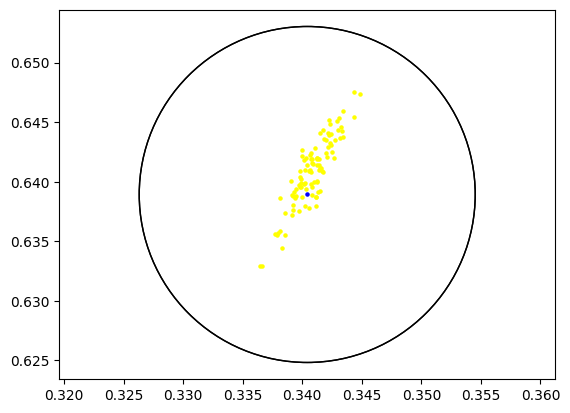

60
60
[0.3413786, 0.34074014, 0.34359905, 0.34211856, 0.34017688, 0.3409273, 0.3364561, 0.3397118, 0.3393619, 0.34048045, 0.3416986, 0.34104013, 0.3397791, 0.34112242, 0.34100667, 0.33968258, 0.3396123, 0.33601117, 0.3398152, 0.34035867, 0.3402203, 0.34360874, 0.34041587, 0.34147558, 0.33980963, 0.33930132, 0.3388722, 0.34177762, 0.34241143, 0.34016114, 0.33841735, 0.33881056, 0.3406405, 0.33972207, 0.33849514, 0.33943707, 0.34120926, 0.34034845, 0.33995748, 0.3407092, 0.34042242, 0.34178308, 0.3424036, 0.34084657, 0.3426313, 0.33877775, 0.3401176, 0.3407056, 0.34102184, 0.33898804, 0.34235147, 0.33763456, 0.3405971, 0.33724698, 0.34175003, 0.34085327, 0.34235927, 0.3380596, 0.3392138, 0.34125018, 0.34008014, 0.3413781, 0.3395004, 0.3408112, 0.3396155, 0.338037, 0.33963382, 0.34103093, 0.3394822, 0.3403846, 0.34174183, 0.34225056, 0.3426764, 0.34189188, 0.3407518, 0.34065494, 0.3392444, 0.3413638, 0.34110188, 0.33984467, 0.3402642, 0.33946922, 0.34238195, 0.34044495, 0.34181452, 0.3440

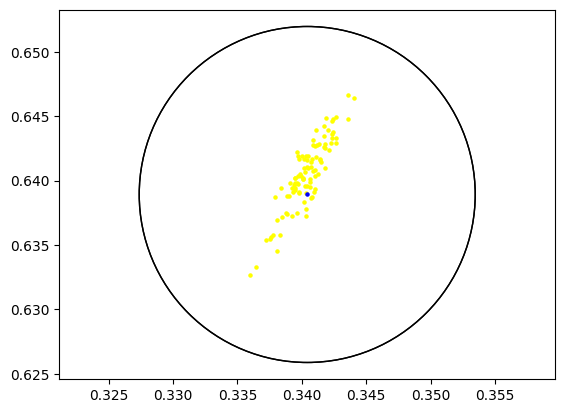

60
60
[0.34071866, 0.3405597, 0.3431415, 0.34168726, 0.339591, 0.3408831, 0.33656096, 0.3395563, 0.33937836, 0.34042624, 0.34154987, 0.34061217, 0.33978614, 0.341016, 0.3408336, 0.3393994, 0.3393454, 0.33600673, 0.3399774, 0.33989346, 0.34010848, 0.34320468, 0.34019706, 0.3410829, 0.33968064, 0.3391132, 0.33896583, 0.34095114, 0.34210557, 0.33985865, 0.33822763, 0.33871943, 0.34042755, 0.33966056, 0.33810794, 0.3393965, 0.3405335, 0.33984432, 0.3397298, 0.3406368, 0.34027958, 0.34156117, 0.341999, 0.34038037, 0.3419442, 0.33857214, 0.33984515, 0.34028736, 0.34061435, 0.33876002, 0.34174103, 0.3377453, 0.34017214, 0.3371924, 0.34152928, 0.3405282, 0.34214437, 0.33762035, 0.33912444, 0.34080625, 0.33984265, 0.34122077, 0.33985537, 0.3405513, 0.3392345, 0.33783358, 0.33929244, 0.3412291, 0.33952025, 0.3402556, 0.34118557, 0.34165344, 0.34211642, 0.3413971, 0.34062365, 0.34048453, 0.33899742, 0.34073034, 0.34077543, 0.33940437, 0.34005108, 0.33944556, 0.34192306, 0.34004954, 0.34125948, 0.

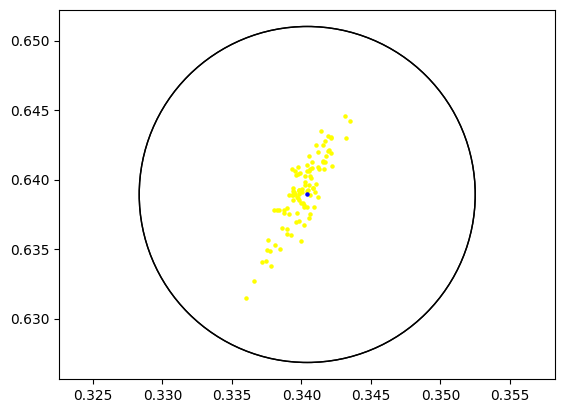

60
60
[0.33980948, 0.339486, 0.34178132, 0.34093842, 0.33878258, 0.3399339, 0.3361962, 0.3387356, 0.3384862, 0.33941048, 0.34065735, 0.33978444, 0.33885714, 0.3400075, 0.33975914, 0.3387536, 0.33881372, 0.33520916, 0.3392054, 0.3391097, 0.3390823, 0.34184733, 0.33914107, 0.33993998, 0.3386491, 0.33804157, 0.33819723, 0.3399109, 0.34086043, 0.33866578, 0.33730265, 0.33791155, 0.33933458, 0.33898544, 0.33702448, 0.338438, 0.33939907, 0.3385921, 0.33867761, 0.33970815, 0.33925772, 0.34043604, 0.3409171, 0.33946946, 0.3409546, 0.33794993, 0.33873993, 0.3393358, 0.33938736, 0.3381344, 0.34050816, 0.33725506, 0.33896995, 0.33633068, 0.34033516, 0.33988452, 0.34099534, 0.33699465, 0.33869255, 0.3401088, 0.3392196, 0.34067684, 0.33927745, 0.3394162, 0.33828577, 0.33734572, 0.3384497, 0.34058163, 0.33921778, 0.33939824, 0.34033304, 0.34023345, 0.3412204, 0.34050116, 0.33958733, 0.34000412, 0.3382232, 0.33983254, 0.34013677, 0.3387644, 0.3391736, 0.3389853, 0.3411716, 0.33885542, 0.34012264, 0.3

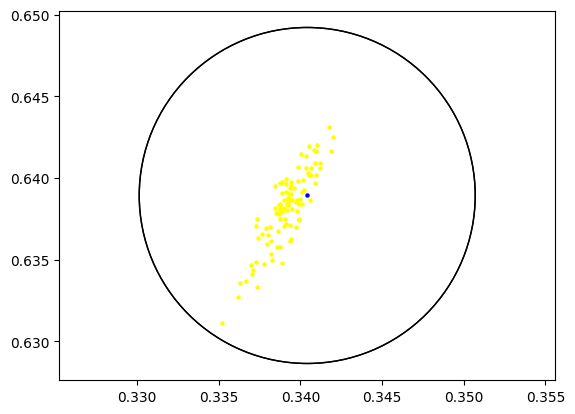

60
60
[0.33905083, 0.33879018, 0.34077078, 0.34021866, 0.33816242, 0.33935067, 0.33614713, 0.3381598, 0.33794564, 0.33874226, 0.34012482, 0.3392016, 0.3382257, 0.3393046, 0.33907795, 0.33818746, 0.33838233, 0.33488473, 0.33868647, 0.33842325, 0.33844683, 0.34083804, 0.33850932, 0.3391471, 0.33803177, 0.33737266, 0.33783114, 0.33902058, 0.33997828, 0.33789083, 0.3368445, 0.33740088, 0.33866292, 0.33858386, 0.33637765, 0.33788443, 0.33902955, 0.3378116, 0.33804363, 0.33918262, 0.3386473, 0.33965912, 0.34015816, 0.3387735, 0.34012374, 0.3376347, 0.33806077, 0.33864728, 0.33858982, 0.3375948, 0.33964399, 0.33716014, 0.33822855, 0.33591804, 0.339465, 0.33924922, 0.3401851, 0.3365569, 0.3383184, 0.3395203, 0.3385833, 0.34017503, 0.33898714, 0.33868378, 0.33764988, 0.3369966, 0.3377507, 0.34027615, 0.3389412, 0.33883756, 0.33955708, 0.33926177, 0.34038445, 0.33961746, 0.3389325, 0.33955765, 0.3377626, 0.33902025, 0.33970922, 0.33864537, 0.33854637, 0.33865196, 0.34046507, 0.3381354, 0.3391765

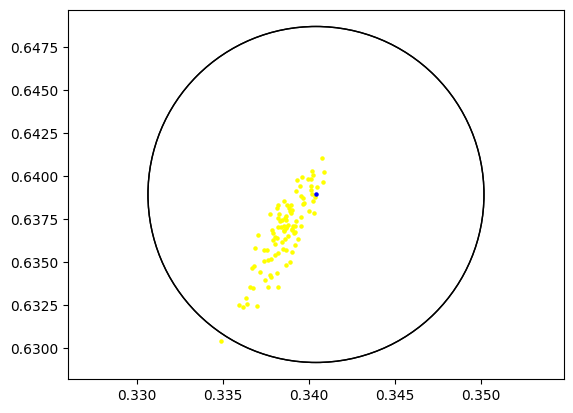

60
60
[0.33821455, 0.33812726, 0.33979478, 0.3392747, 0.33749592, 0.33873883, 0.33599323, 0.33740842, 0.33742154, 0.3380741, 0.33944488, 0.33847862, 0.33752912, 0.33843938, 0.3383878, 0.33750132, 0.33778846, 0.33466184, 0.33807272, 0.33755797, 0.3378262, 0.33980796, 0.33783346, 0.33821478, 0.33746752, 0.33676055, 0.33737504, 0.33803374, 0.3390921, 0.33720115, 0.33637813, 0.33669257, 0.33802354, 0.33803573, 0.33563906, 0.3373888, 0.3374716, 0.33697918, 0.3374677, 0.33867157, 0.33815503, 0.33889243, 0.3392357, 0.33792734, 0.33912387, 0.33726856, 0.33746386, 0.33791798, 0.3377384, 0.33682457, 0.33868325, 0.33694726, 0.3376336, 0.3355214, 0.33853972, 0.33837074, 0.33936805, 0.33605498, 0.3377389, 0.33875373, 0.33770445, 0.33948037, 0.33863193, 0.33799353, 0.33690768, 0.33650476, 0.33685258, 0.33976892, 0.33845046, 0.33809158, 0.3386029, 0.3383388, 0.33933473, 0.3385531, 0.33831882, 0.33886322, 0.33722144, 0.33801767, 0.33880106, 0.33734477, 0.33776385, 0.33814135, 0.33954734, 0.3375595, 0.

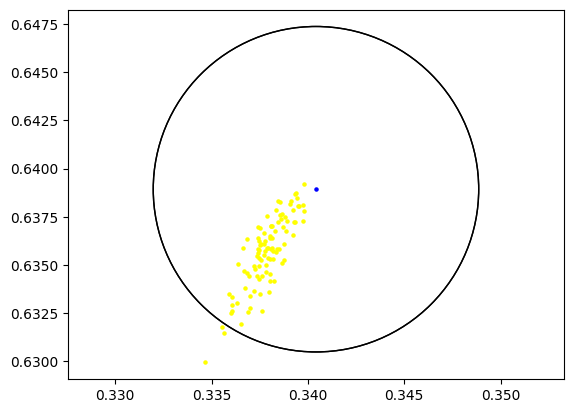

60
60
[0.33794385, 0.33780465, 0.33919996, 0.33876973, 0.33740285, 0.33841825, 0.33630583, 0.33713794, 0.3373133, 0.33775833, 0.339198, 0.33823937, 0.33715037, 0.33803958, 0.33803952, 0.33736926, 0.3376757, 0.3348648, 0.3376568, 0.3371984, 0.33759078, 0.33910102, 0.33753157, 0.33779588, 0.33733448, 0.33658206, 0.33731067, 0.33757043, 0.33857402, 0.3369996, 0.33633822, 0.33641458, 0.33772627, 0.3379534, 0.33549717, 0.3373259, 0.33705878, 0.3365666, 0.33729348, 0.3384644, 0.33804473, 0.33848074, 0.3388216, 0.33760598, 0.33854184, 0.33746377, 0.3372907, 0.33765444, 0.3373842, 0.33654663, 0.3382579, 0.33720836, 0.3375008, 0.33553752, 0.33794987, 0.33796582, 0.33888894, 0.33612433, 0.3376295, 0.33850962, 0.33727944, 0.33927357, 0.33853316, 0.33763126, 0.3367139, 0.33642137, 0.33646423, 0.33958977, 0.33841646, 0.33775905, 0.33814752, 0.3377451, 0.33866933, 0.3380135, 0.33809167, 0.33855274, 0.33721936, 0.3375126, 0.3385926, 0.33699661, 0.33747092, 0.3381048, 0.3390614, 0.33742994, 0.33746615

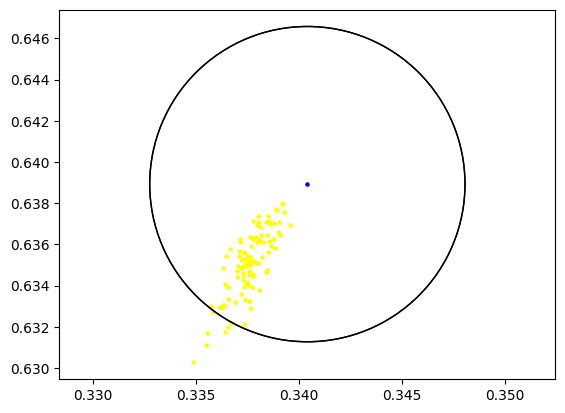

60
60
[0.33808458, 0.33779156, 0.33897576, 0.3385933, 0.337703, 0.33836022, 0.33680335, 0.33716136, 0.3375115, 0.33771998, 0.33920652, 0.3382864, 0.33701652, 0.3379215, 0.33798313, 0.33754736, 0.3378118, 0.33536077, 0.33743626, 0.3372595, 0.3376651, 0.3387616, 0.33757424, 0.337811, 0.33754784, 0.3367843, 0.3375137, 0.33752665, 0.33842847, 0.33717287, 0.33651128, 0.3364283, 0.33778182, 0.33813575, 0.33580816, 0.33755887, 0.33703107, 0.3365293, 0.33744982, 0.3385188, 0.3382711, 0.338353, 0.3387432, 0.33766362, 0.33830398, 0.3378724, 0.33743238, 0.33784452, 0.33738875, 0.33660245, 0.33813286, 0.33766085, 0.3377304, 0.33584046, 0.33773705, 0.3378838, 0.3387092, 0.33655494, 0.33771032, 0.33855218, 0.3371991, 0.3393398, 0.33856973, 0.3376214, 0.33693382, 0.33661342, 0.33647746, 0.33957857, 0.33860174, 0.33770946, 0.33803812, 0.33746547, 0.3382862, 0.33782196, 0.33816528, 0.3384928, 0.33752313, 0.33734664, 0.33870628, 0.33703005, 0.33754244, 0.33834356, 0.3388824, 0.33765092, 0.33735535, 0.33

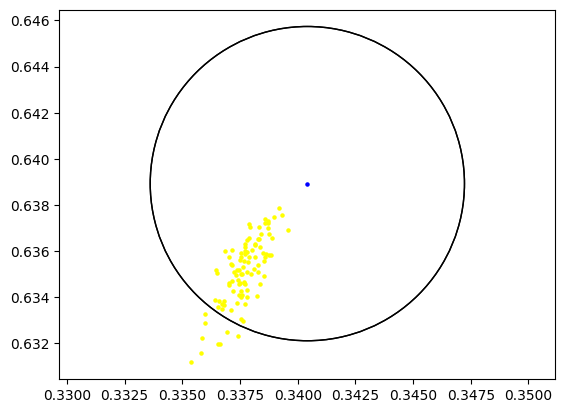

60
60
[0.3382297, 0.33788458, 0.3392115, 0.33914843, 0.33800647, 0.33838153, 0.33721605, 0.33719045, 0.33774036, 0.3377283, 0.33961976, 0.33887178, 0.33714443, 0.33788466, 0.3380548, 0.33764252, 0.33791113, 0.3359028, 0.3375358, 0.3374281, 0.33781892, 0.338559, 0.33774945, 0.3379752, 0.33783922, 0.33710262, 0.3377887, 0.33794132, 0.3383913, 0.3374118, 0.33728513, 0.33656022, 0.33797556, 0.33826786, 0.33692265, 0.33782881, 0.33817536, 0.33685276, 0.3376993, 0.33866125, 0.338468, 0.33829108, 0.33870047, 0.33842447, 0.3384443, 0.3381468, 0.33759123, 0.33806354, 0.3374902, 0.3369339, 0.3379799, 0.338571, 0.3383199, 0.33622974, 0.33768022, 0.33841196, 0.33859438, 0.33699048, 0.33796048, 0.33928192, 0.33737954, 0.33934107, 0.338565, 0.33771387, 0.3372376, 0.33732915, 0.3369658, 0.33954096, 0.33877474, 0.33826554, 0.33796495, 0.33731526, 0.33795363, 0.33784425, 0.33826151, 0.33844274, 0.33787197, 0.33725747, 0.3395885, 0.3382335, 0.33823287, 0.3385191, 0.33899772, 0.33791384, 0.33737516, 0.33

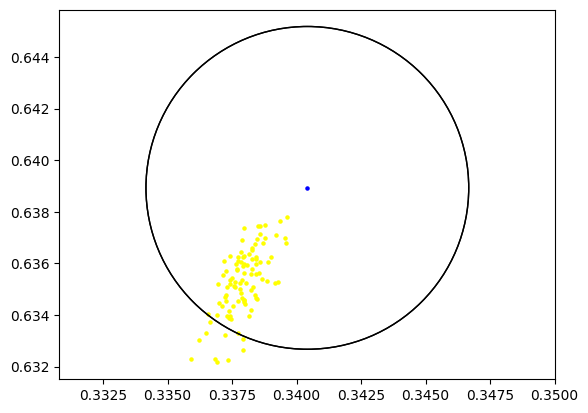

60
60
[0.3385124, 0.3382169, 0.33898982, 0.33849466, 0.33842996, 0.33857122, 0.33767593, 0.3373613, 0.3380935, 0.33792287, 0.33938286, 0.33854035, 0.33713835, 0.33795992, 0.33835375, 0.33774698, 0.3381442, 0.33659765, 0.3374686, 0.3377898, 0.33813894, 0.33868968, 0.33816567, 0.33826154, 0.33824077, 0.3376142, 0.33826435, 0.3378079, 0.3386419, 0.33782053, 0.33699352, 0.3367505, 0.33843094, 0.3384949, 0.33698997, 0.33815163, 0.3370404, 0.33717555, 0.3381432, 0.33902574, 0.33870646, 0.33843133, 0.33884066, 0.33809286, 0.3383162, 0.33837733, 0.3378884, 0.33833897, 0.3377726, 0.337013, 0.33792725, 0.33846566, 0.33848947, 0.33684042, 0.33794552, 0.33802658, 0.33867663, 0.33759192, 0.33777815, 0.33863062, 0.33735347, 0.33943087, 0.33868933, 0.33803964, 0.33777833, 0.3372584, 0.33702475, 0.33964893, 0.33890557, 0.3379846, 0.33810785, 0.33747166, 0.3378304, 0.33757812, 0.33850113, 0.33861184, 0.3382063, 0.3372269, 0.33888817, 0.3375051, 0.33804262, 0.33877692, 0.33875087, 0.33831996, 0.337675, 

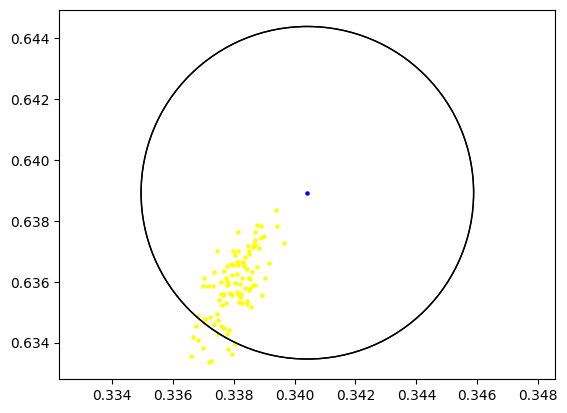

60
60
[0.3389568, 0.33879754, 0.33951673, 0.33874112, 0.33895785, 0.3388847, 0.3382316, 0.33770582, 0.3386011, 0.33833334, 0.33979255, 0.33898637, 0.3376202, 0.3382777, 0.3389013, 0.33785754, 0.33854622, 0.33741474, 0.33791584, 0.33847952, 0.33863068, 0.33910802, 0.33880326, 0.3388324, 0.33877617, 0.33834502, 0.33895797, 0.33825386, 0.33919775, 0.3384898, 0.33748564, 0.33714122, 0.3391495, 0.33882818, 0.3380465, 0.3385822, 0.33736107, 0.33800665, 0.33879507, 0.33957502, 0.33902833, 0.33875793, 0.33916852, 0.33864146, 0.3388031, 0.33859164, 0.33834854, 0.33882377, 0.3382421, 0.33753154, 0.33790815, 0.33903965, 0.3392131, 0.337688, 0.33854735, 0.33851492, 0.338962, 0.3383849, 0.33793804, 0.3388541, 0.33779567, 0.33963203, 0.3389509, 0.33853915, 0.3385145, 0.3378899, 0.337866, 0.3399543, 0.3391861, 0.33860236, 0.3384728, 0.33785388, 0.33784235, 0.33768052, 0.3389233, 0.33897743, 0.33874276, 0.3373408, 0.33915403, 0.3381942, 0.33871168, 0.3391279, 0.33897966, 0.33886287, 0.3382469, 0.33900

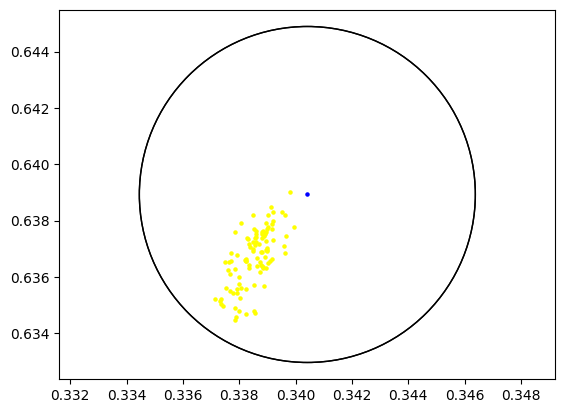

60
60
[0.33979926, 0.33964556, 0.34063008, 0.33994412, 0.33977628, 0.33936393, 0.3391108, 0.33842912, 0.33937073, 0.33903244, 0.3407711, 0.34024718, 0.3384668, 0.33886153, 0.33967987, 0.3382772, 0.33934146, 0.33841336, 0.33874637, 0.3396392, 0.33931386, 0.33978385, 0.33968517, 0.33971658, 0.33950552, 0.33932462, 0.33989447, 0.33931205, 0.3400514, 0.33946872, 0.33868757, 0.33781686, 0.34014028, 0.33951536, 0.33987945, 0.3392327, 0.33896607, 0.3391928, 0.33970827, 0.34028986, 0.33955714, 0.33932412, 0.33980113, 0.34007895, 0.33987734, 0.3390751, 0.3390572, 0.33969423, 0.3389533, 0.3385223, 0.33812386, 0.34035513, 0.34040573, 0.33881825, 0.33948678, 0.33986896, 0.33951244, 0.3395552, 0.33855626, 0.34002978, 0.3387586, 0.34016272, 0.33947325, 0.3392577, 0.33954206, 0.3392873, 0.33942106, 0.3405104, 0.33980584, 0.33997393, 0.33923092, 0.33843553, 0.33816123, 0.3382095, 0.33966184, 0.33972543, 0.33956468, 0.33778498, 0.34046444, 0.34025186, 0.34018645, 0.33982947, 0.33976814, 0.33960223, 0.3

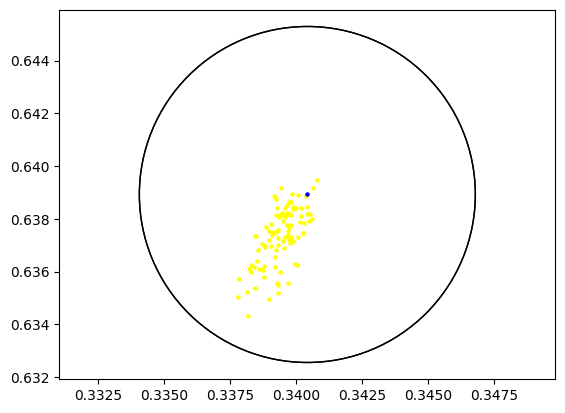

60
60
[0.34065938, 0.3402867, 0.3411571, 0.34003958, 0.34047088, 0.33953744, 0.3399211, 0.33911255, 0.33993053, 0.33954126, 0.34113774, 0.34046373, 0.33911452, 0.33926532, 0.3401496, 0.33871874, 0.3401036, 0.33906922, 0.33919936, 0.34082896, 0.33967954, 0.34012723, 0.3403664, 0.3405106, 0.33990383, 0.34004378, 0.34060255, 0.3397381, 0.34064668, 0.34016475, 0.33908817, 0.33845395, 0.3408565, 0.34016967, 0.3405901, 0.3396209, 0.33846164, 0.34004623, 0.34040028, 0.3406415, 0.33982462, 0.33965912, 0.3402394, 0.34040895, 0.34060255, 0.33944187, 0.33955297, 0.34051523, 0.3395218, 0.33923346, 0.3381609, 0.3407578, 0.3410695, 0.339794, 0.34012914, 0.34039158, 0.33987808, 0.3406396, 0.3389221, 0.33994743, 0.33954373, 0.3406164, 0.33982027, 0.33968204, 0.34033087, 0.3398657, 0.34056926, 0.34093836, 0.3403791, 0.34057897, 0.3398862, 0.33864844, 0.33841747, 0.33862883, 0.3402572, 0.3404211, 0.34019968, 0.33817682, 0.34052345, 0.340635, 0.34073097, 0.3405162, 0.34026936, 0.34014684, 0.33993602, 0.3

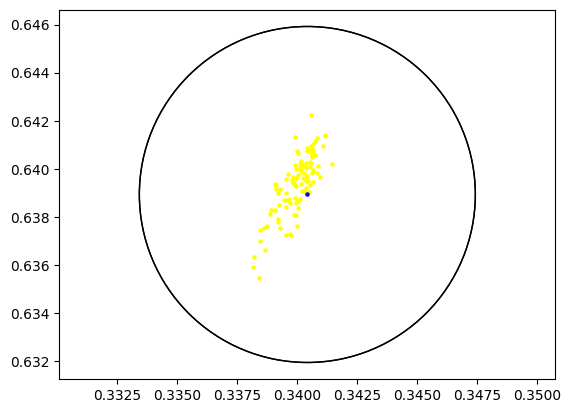

60
60
[0.3424546, 0.34214374, 0.34310204, 0.34156626, 0.34202316, 0.3409477, 0.34152922, 0.3408318, 0.34168854, 0.341375, 0.34279796, 0.34187815, 0.34097663, 0.3408715, 0.34180877, 0.34023914, 0.3417803, 0.34087434, 0.34083173, 0.34302235, 0.34128976, 0.3417035, 0.34213105, 0.342318, 0.34163404, 0.3419936, 0.3423535, 0.34126166, 0.34250003, 0.34207496, 0.34094417, 0.3400407, 0.3428235, 0.34181166, 0.34272298, 0.34134755, 0.33995625, 0.34184355, 0.342225, 0.3421338, 0.3413622, 0.34119612, 0.34169036, 0.3420338, 0.34233066, 0.340736, 0.34122086, 0.34219998, 0.34129047, 0.34087524, 0.33919707, 0.3424634, 0.34306473, 0.3419032, 0.34204236, 0.34215283, 0.34150952, 0.3425626, 0.34035608, 0.34132102, 0.34130618, 0.34207413, 0.3414364, 0.34131166, 0.34191743, 0.3415954, 0.34278283, 0.34240133, 0.34194815, 0.34248012, 0.34141773, 0.3400616, 0.33966243, 0.34010315, 0.34221384, 0.3419875, 0.34174109, 0.33945206, 0.34214613, 0.3427157, 0.34257886, 0.3422103, 0.34181046, 0.34189788, 0.34161693, 0.3

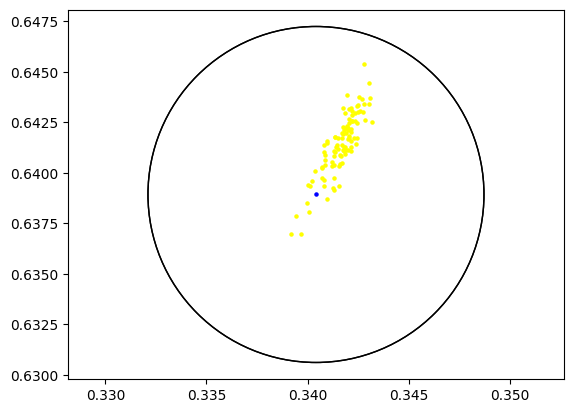

60
60
[0.34134033, 0.34111625, 0.3419596, 0.34041244, 0.34079, 0.33999616, 0.34071887, 0.3399403, 0.34051785, 0.34062076, 0.34201685, 0.3410055, 0.34014702, 0.34004, 0.3406266, 0.33923656, 0.34077847, 0.34019008, 0.33984587, 0.34245265, 0.34036502, 0.34073073, 0.34113064, 0.3415043, 0.34071362, 0.3411361, 0.3412038, 0.34003782, 0.34180206, 0.34089333, 0.33995295, 0.3392131, 0.3418717, 0.3411256, 0.34162074, 0.3404404, 0.33893675, 0.34064773, 0.34114245, 0.34130758, 0.34023446, 0.339892, 0.3407011, 0.34075597, 0.34164613, 0.33963844, 0.34017554, 0.3409981, 0.34027413, 0.3398033, 0.33824772, 0.34186813, 0.34180984, 0.34070298, 0.34111625, 0.34123674, 0.34050256, 0.34168962, 0.33938828, 0.33998793, 0.34010217, 0.34102976, 0.34076658, 0.34018114, 0.34065127, 0.34044692, 0.34199157, 0.3416848, 0.34111655, 0.34142163, 0.34027028, 0.33914042, 0.33863539, 0.3388063, 0.3412476, 0.3412055, 0.34087753, 0.3382613, 0.34084374, 0.34190375, 0.34171665, 0.34154874, 0.34068048, 0.3409498, 0.3404473, 0.

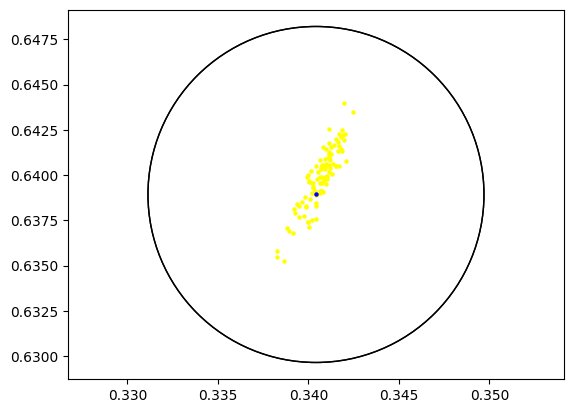

60
60
[0.34474194, 0.34411696, 0.3455057, 0.3441395, 0.34375507, 0.34182534, 0.34364012, 0.34284753, 0.34329024, 0.34284294, 0.3454337, 0.34435046, 0.34316498, 0.34299606, 0.34298664, 0.34248024, 0.3440313, 0.3425403, 0.34279418, 0.34598148, 0.34245634, 0.34306923, 0.3439589, 0.34485397, 0.3430951, 0.3438995, 0.3441343, 0.3434572, 0.34439763, 0.3434544, 0.34350374, 0.34219664, 0.34428266, 0.34391764, 0.34566307, 0.34248537, 0.3424297, 0.3440169, 0.34384006, 0.34347224, 0.34247088, 0.34265658, 0.34319562, 0.34442908, 0.34493816, 0.34222156, 0.34271112, 0.34438238, 0.3433335, 0.3430283, 0.34051266, 0.34515813, 0.34556645, 0.3443101, 0.34356713, 0.34489268, 0.34334987, 0.3448614, 0.34253883, 0.34364265, 0.34371775, 0.3441482, 0.3432717, 0.34258038, 0.3437397, 0.3442722, 0.3458793, 0.3444429, 0.3444754, 0.3452788, 0.34338328, 0.34116903, 0.3411848, 0.34226122, 0.34422055, 0.34399262, 0.34419507, 0.34108582, 0.34471956, 0.34616354, 0.34561238, 0.34466875, 0.34406704, 0.34375274, 0.3435502, 

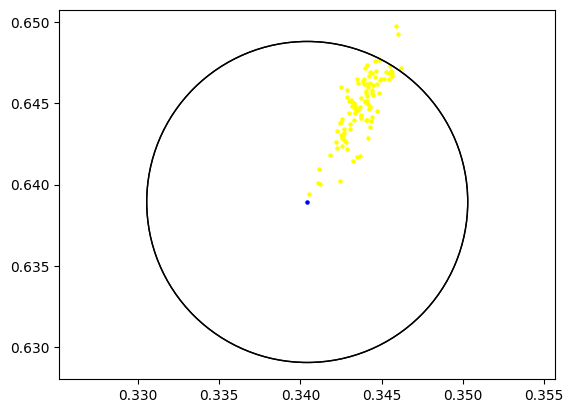

60
60
[0.34525818, 0.34529224, 0.347089, 0.3442157, 0.3439641, 0.34233505, 0.34398606, 0.344015, 0.34382927, 0.3439768, 0.34680468, 0.34527138, 0.34461343, 0.34418032, 0.34448794, 0.34268367, 0.34497812, 0.34336087, 0.3436946, 0.3477404, 0.34343472, 0.3440058, 0.34466365, 0.3459282, 0.34444672, 0.34553373, 0.3450832, 0.3437647, 0.3459314, 0.3446385, 0.34427178, 0.3427248, 0.34556016, 0.34473926, 0.34715134, 0.34376535, 0.3425905, 0.3447693, 0.3447685, 0.3445022, 0.34270227, 0.3433503, 0.34419838, 0.3450082, 0.34607384, 0.34252417, 0.34311336, 0.3445685, 0.34428924, 0.34364486, 0.3405683, 0.3461202, 0.34688875, 0.34557858, 0.3451386, 0.34600958, 0.34418482, 0.34608406, 0.34320065, 0.34383124, 0.34418547, 0.34494865, 0.34421325, 0.34272814, 0.3446544, 0.3447135, 0.347835, 0.34569275, 0.34563988, 0.34662592, 0.3440418, 0.34206107, 0.34146398, 0.34270155, 0.3452524, 0.34470832, 0.34522787, 0.3408585, 0.34499443, 0.34698424, 0.3471822, 0.34539643, 0.34432507, 0.34453616, 0.34461588, 0.34556

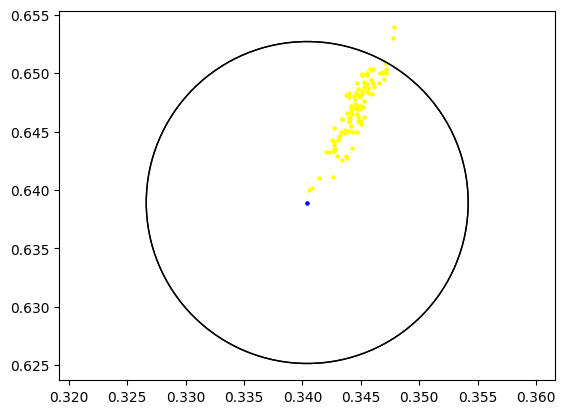

60
60
[0.330241, 0.33152413, 0.3311534, 0.32956275, 0.32886598, 0.32963207, 0.33029842, 0.33071405, 0.33053446, 0.32949546, 0.33319956, 0.33219245, 0.33144972, 0.33235392, 0.33142352, 0.32980677, 0.3313175, 0.33150357, 0.33122152, 0.33117992, 0.32936853, 0.32990602, 0.3315145, 0.32984638, 0.33308405, 0.33341396, 0.3327441, 0.32834846, 0.33058697, 0.32988444, 0.33090255, 0.33060953, 0.33048707, 0.33193648, 0.33107337, 0.3323881, 0.32730365, 0.3290644, 0.33176196, 0.33260757, 0.33010218, 0.33105093, 0.33094925, 0.32964662, 0.33128765, 0.33098185, 0.3277182, 0.32976097, 0.33094195, 0.32891387, 0.32856268, 0.33258292, 0.3312803, 0.33121243, 0.33193493, 0.33175868, 0.3313951, 0.33141032, 0.33038694, 0.32813317, 0.32884544, 0.3310113, 0.332846, 0.3294196, 0.33101293, 0.33036333, 0.3318021, 0.33357388, 0.33427405, 0.3327426, 0.33026138, 0.3302457, 0.32846713, 0.32860854, 0.3313873, 0.3309222, 0.33181664, 0.3287615, 0.32898304, 0.33127245, 0.33237457, 0.33248985, 0.33011624, 0.3300827, 0.32913

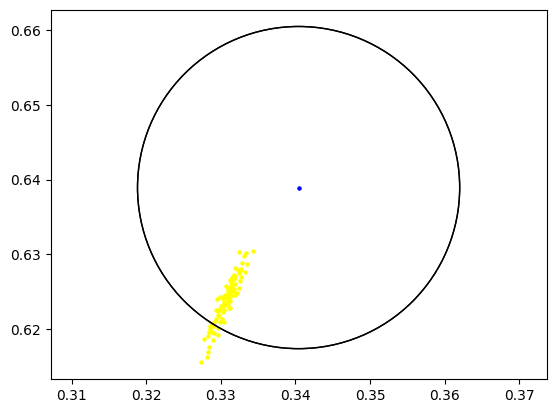

60
60
[0.34176984, 0.34203228, 0.34048072, 0.34214845, 0.34117728, 0.34096748, 0.34272185, 0.34188968, 0.34191504, 0.3403494, 0.34326828, 0.34233904, 0.34119847, 0.34286705, 0.34060308, 0.34314057, 0.34212035, 0.3424643, 0.34203246, 0.34111655, 0.33990955, 0.3397919, 0.34200922, 0.34099784, 0.34295958, 0.34280866, 0.34270275, 0.34009346, 0.340252, 0.33959323, 0.34278166, 0.34249046, 0.34035683, 0.34379566, 0.34088033, 0.34298348, 0.33990103, 0.33948538, 0.34188062, 0.342371, 0.3416574, 0.34162572, 0.34076953, 0.34036353, 0.34128892, 0.34301552, 0.3400197, 0.34165376, 0.34169343, 0.34001356, 0.34076288, 0.34385663, 0.3410536, 0.34137228, 0.34060353, 0.34195635, 0.3422653, 0.34194112, 0.3419317, 0.3406524, 0.3405195, 0.3424585, 0.3441148, 0.34121728, 0.3410867, 0.34236702, 0.34046987, 0.34380803, 0.34523135, 0.34264654, 0.34112054, 0.33972943, 0.34042516, 0.34096408, 0.34229505, 0.34188586, 0.34277454, 0.3408269, 0.34164926, 0.34242234, 0.34286126, 0.3443128, 0.34187776, 0.34165, 0.33900

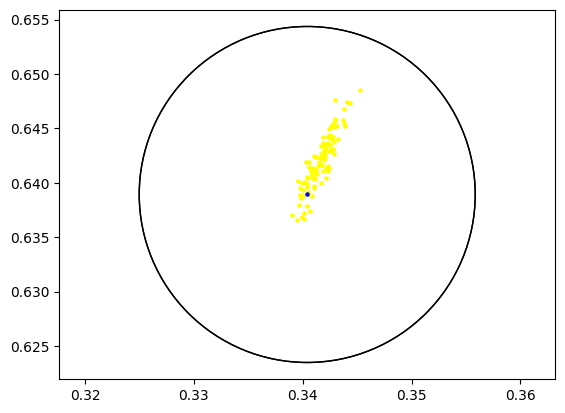

60
60
[0.34047517, 0.3410814, 0.33993915, 0.34148762, 0.34046197, 0.33981612, 0.34199485, 0.34100702, 0.34096992, 0.33950803, 0.3421358, 0.34106344, 0.34022132, 0.341608, 0.33881885, 0.34234273, 0.3409886, 0.34112012, 0.3409157, 0.34040594, 0.33899456, 0.3387303, 0.34035972, 0.34062707, 0.34124103, 0.34088165, 0.34083775, 0.3392908, 0.33942467, 0.33863136, 0.34205744, 0.34108073, 0.33938384, 0.34249014, 0.3404184, 0.3410145, 0.34002596, 0.33884504, 0.34027746, 0.34040642, 0.3404608, 0.34031355, 0.33932585, 0.33970806, 0.34012017, 0.34164333, 0.3400913, 0.34090114, 0.340447, 0.33936003, 0.33977395, 0.3430475, 0.34038016, 0.34062237, 0.33889687, 0.34100923, 0.34092152, 0.3408574, 0.34095988, 0.34076968, 0.34006348, 0.34163174, 0.3428481, 0.34025908, 0.3396432, 0.34156314, 0.33938494, 0.34245494, 0.3436136, 0.34171858, 0.34016287, 0.33811784, 0.33924788, 0.34054977, 0.34149805, 0.34039044, 0.34196317, 0.33929995, 0.34145123, 0.34158212, 0.3423816, 0.34313804, 0.3408958, 0.34100997, 0.3382

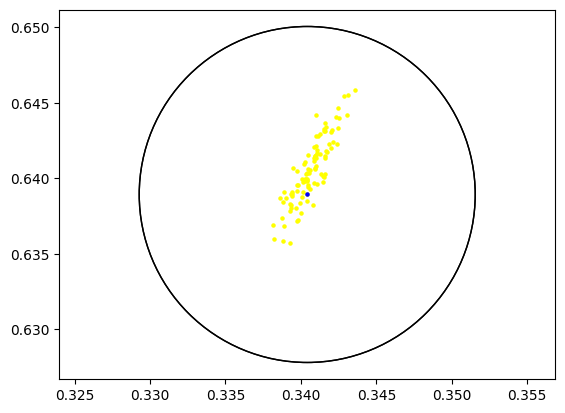

60
60
[0.34018832, 0.3410097, 0.34018442, 0.3412505, 0.34044752, 0.33970386, 0.34175593, 0.34102863, 0.34089276, 0.33961394, 0.34181935, 0.3407531, 0.34009942, 0.34145528, 0.33846042, 0.3422304, 0.34060588, 0.34078273, 0.34069145, 0.3405602, 0.33900332, 0.33874267, 0.33997956, 0.34081182, 0.34102178, 0.34062892, 0.34033546, 0.3390609, 0.33954996, 0.3388101, 0.34183022, 0.34058195, 0.33940127, 0.34231827, 0.34053618, 0.34066036, 0.3401359, 0.33875898, 0.33998638, 0.3399093, 0.3403523, 0.34005925, 0.33908325, 0.3396243, 0.3398601, 0.3413005, 0.34050077, 0.34097162, 0.3401751, 0.3392517, 0.3396009, 0.34272847, 0.34042677, 0.3404483, 0.33870703, 0.34089214, 0.34062436, 0.3407842, 0.340608, 0.3408786, 0.3401205, 0.34159246, 0.34257534, 0.3401969, 0.33938497, 0.34119627, 0.33923918, 0.34222308, 0.3430922, 0.34155312, 0.34008062, 0.33772185, 0.33892062, 0.34066567, 0.34151334, 0.33994198, 0.34177205, 0.33876434, 0.34148592, 0.34126166, 0.34249598, 0.3429373, 0.34061483, 0.34109014, 0.338382, 

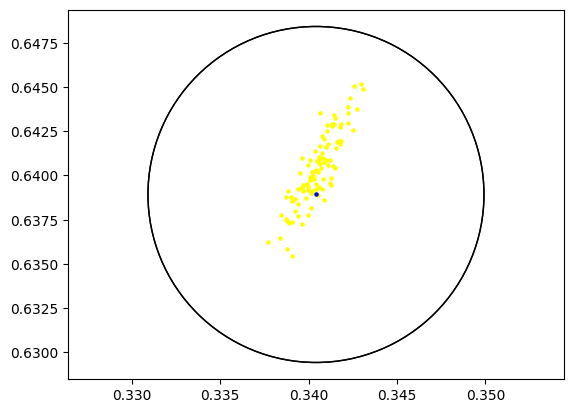

60
60
[0.33995524, 0.340973, 0.34033868, 0.34107187, 0.340406, 0.3396663, 0.3416775, 0.34115225, 0.3409822, 0.33965987, 0.34161106, 0.34069926, 0.34016132, 0.34150425, 0.33832458, 0.34216657, 0.3403788, 0.34065524, 0.34080333, 0.34051406, 0.33898106, 0.33875716, 0.33982602, 0.3407167, 0.34096003, 0.3406461, 0.34023908, 0.3388333, 0.33958393, 0.33898646, 0.34179378, 0.34037462, 0.33932358, 0.34230107, 0.34053808, 0.3406213, 0.3401593, 0.33862877, 0.3399638, 0.33970198, 0.34043527, 0.34002545, 0.3389255, 0.33955923, 0.3397181, 0.34124, 0.34074157, 0.3411174, 0.33997175, 0.33916828, 0.33949822, 0.3425261, 0.3403917, 0.34028703, 0.33880183, 0.34092432, 0.340505, 0.34077835, 0.34044772, 0.34086102, 0.3401357, 0.34158576, 0.342566, 0.3402115, 0.33933744, 0.34101093, 0.33915746, 0.34215462, 0.34289807, 0.3415631, 0.34011167, 0.3375375, 0.3386985, 0.3407917, 0.3414912, 0.33971843, 0.34160742, 0.33853465, 0.34145975, 0.34104204, 0.34261268, 0.34289104, 0.34043953, 0.34114003, 0.33840984, 0.3391

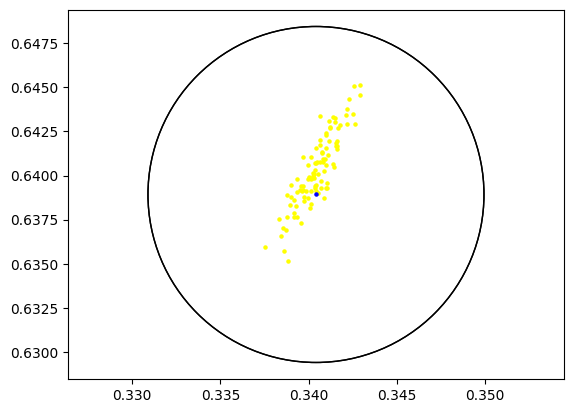

[0.0005162902105528034,
 0.0001743697091762897,
 0.00010654871187185222,
 9.824661305913196e-05,
 9.384038883254675e-05,
 9.037367953311559e-05,
 8.715020088658321e-05,
 8.360293257187124e-05,
 7.558183017266628e-05,
 6.31423944588505e-05,
 5.196081029680499e-05,
 4.046152205432918e-05,
 3.195985764880227e-05,
 2.604391217303714e-05,
 2.2003869070346127e-05,
 1.8672374177697294e-05,
 1.6045281569390114e-05,
 1.4067161492015145e-05,
 1.3637510579513901e-05,
 1.5458067453195668e-05,
 1.9723474071717816e-05,
 2.758677728408543e-05,
 3.138287327534073e-05,
 3.900028838589975e-05,
 7.5141014272333e-05,
 0.0002033546132952324,
 9.825524933631868e-05,
 5.1544734859909624e-05,
 3.434124765335333e-05,
 3.228527969390882e-05]

In [99]:
from numpy import sqrt, quantile


class DeepSVDD(nn.Module):
    def __init__(self, autoencoder):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(20, 20, bias=False),
            nn.LeakyReLU(),
            nn.Linear(20, 10, bias=False),
            nn.LeakyReLU(),
            nn.Linear(10, 2, bias=False)
        ).to(device)
        net_dict = self.state_dict()
        ae_dict = ae.state_dict()
        ae_dict = {k: v for k, v in ae_dict.items() if k in net_dict}
        net_dict.update(ae_dict)
        self.load_state_dict(net_dict)

    def forward(self, x):
        return self.layers(x)


# Trainer can train models for either soft-boundary Deep SVDD or One-Class Deep SVDD
class DeepSVDDTrainer:
    def __init__(self, model, goal, c_size):
        self.model = model
        self.goal = goal
        self.c = torch.tensor([0, 0], dtype=torch.float32, device=device)
        self.R = torch.tensor(0, dtype=torch.float32, device=device)

    def train(self, training_data):
        optimizer = torch.optim.Adam(dsvdd.parameters(), lr=0.01)
        train_loader = torch.utils.data.DataLoader(list(zip(training_data, training_data)), batch_size=1)
        warmup_epoch = 5
        nu = 0.1

        losses = []

        for epoch in range(30):
            epoch_loss = []
            keks = []
            for data in train_loader:
                inputs, targets = data
                optimizer.zero_grad()
                outputs = dsvdd.forward(norm(inputs))
                dist = torch.sum((outputs - self.c) ** 2, dim=1)
                keks.append(dist.item())
                if self.goal == 'one-class':
                    loss = torch.mean(dist)
                else:
                    scores = dist - self.R ** 2
                    # Use default nu of 0.1 for now
                    loss = self.R ** 2 + (1 / nu) * torch.mean(torch.max(torch.zeros_like(scores), scores))
                loss.backward()
                optimizer.step()
                epoch_loss.append(loss.item())

            if epoch >= warmup_epoch:
                #print(keks)
                #print(quantile(sqrt(keks), 1 - nu))
                self.R = torch.tensor(quantile(sqrt(keks), 1 - nu))
            losses.append(sum(epoch_loss) / len(epoch_loss))
            plot(self)
        return losses

    def set_center(self, transformed_data):
        with torch.no_grad():
            self.c = torch.zeros(2, device='cuda')
            for x in transformed_data:
                self.c += dsvdd.forward(torch.nn.functional.normalize(x, p=2, dim=0))

            self.c /= len(transformed_data)

    # First copy weights from autoencoder to DeepSVDD network


#mixin outliers with transformed data


dsvdd = DeepSVDD(ae)
dsvdd_trainer = DeepSVDDTrainer(dsvdd, 'one-class', 2)
dsvdd_trainer.set_center(mixin_training)
plot(dsvdd_trainer)
dsvdd_trainer.train(transformed_data)



tensor(0.0095, dtype=torch.float64)
tensor([0.3404, 0.6389], device='cuda:0')
60
60
[0.33995524, 0.340973, 0.34033868, 0.34107187, 0.340406, 0.3396663, 0.3416775, 0.34115225, 0.3409822, 0.33965987, 0.34161106, 0.34069926, 0.34016132, 0.34150425, 0.33832458, 0.34216657, 0.3403788, 0.34065524, 0.34080333, 0.34051406, 0.33898106, 0.33875716, 0.33982602, 0.3407167, 0.34096003, 0.3406461, 0.34023908, 0.3388333, 0.33958393, 0.33898646, 0.34179378, 0.34037462, 0.33932358, 0.34230107, 0.34053808, 0.3406213, 0.3401593, 0.33862877, 0.3399638, 0.33970198, 0.34043527, 0.34002545, 0.3389255, 0.33955923, 0.3397181, 0.34124, 0.34074157, 0.3411174, 0.33997175, 0.33916828, 0.33949822, 0.3425261, 0.3403917, 0.34028703, 0.33880183, 0.34092432, 0.340505, 0.34077835, 0.34044772, 0.34086102, 0.3401357, 0.34158576, 0.342566, 0.3402115, 0.33933744, 0.34101093, 0.33915746, 0.34215462, 0.34289807, 0.3415631, 0.34011167, 0.3375375, 0.3386985, 0.3407917, 0.3414912, 0.33971843, 0.34160742, 0.33853465, 0.34145975, 

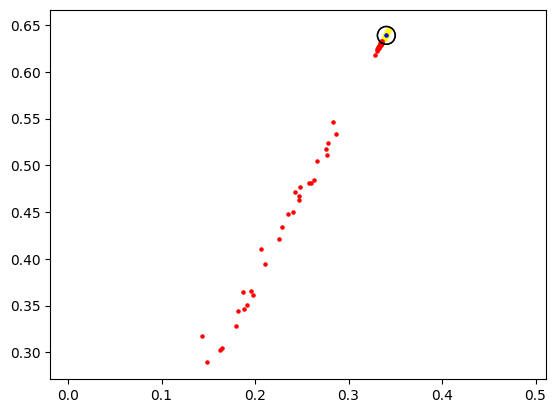

In [100]:
figure, axes = plt.subplots()
uc_3 = plt.Circle(dsvdd_trainer.c, dsvdd_trainer.R, fill=False)

new_x = []
new_y = []

print(dsvdd_trainer.R)
print(dsvdd_trainer.c)
for data in transformed_data:
    map = dsvdd.forward(torch.nn.functional.normalize(data, p=2, dim=0)).cpu().detach().numpy()
    new_x.append(map[0])
    new_y.append(map[1])

#print(mixin_training[-10:])
anomalous = transformed_data[0].cpu().detach().numpy()
#
anomalous[0] = random.random() * -20
anomalous[1] = random.random() * -15

an_x = []
an_y = []
print(len(t_outlier_data))
for outlier in t_outlier_data:
    outlier_pos = dsvdd.forward(torch.nn.functional.normalize(outlier, p=2, dim=0)).cpu().detach().numpy()
    an_x.append(outlier_pos[0])
    an_y.append(outlier_pos[1])

print(len(an_x))
anomalous = torch.tensor(anomalous, dtype=torch.float32, device=device)
an = dsvdd.forward(torch.nn.functional.normalize(anomalous, p=2, dim=0)).cpu().detach().numpy()
center = dsvdd_trainer.c.cpu().detach().numpy()
points_2 = plt.scatter(new_x, new_y,
                       color="yellow", s=5)
print(new_x)
print(new_y)
plt.scatter(an_x, an_y,
            color="red", s=5)
plt.scatter(center[0], center[1],
            color="blue", s=5)
axes.add_artist(uc_3)
plt.gca().add_patch(uc_3)
plt.axis('equal')
plt.show()
